In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data/mRNA.csv')
df.head()

,sample,TCGA-AR-A5QQ-01,TCGA-D8-A1JA-01,TCGA-BH-A0BQ-01,TCGA-BH-A0BT-01,TCGA-A8-A06X-01,TCGA-A8-A096-01,TCGA-BH-A0C7-01,TCGA-AC-A5XU-01,TCGA-PE-A5DE-01,...,TCGA-A7-A13E-11,TCGA-C8-A8HP-01,TCGA-E9-A5FL-01,TCGA-AC-A2FB-11,TCGA-E2-A15F-01,TCGA-A2-A3XT-01,TCGA-B6-A0X7-01,TCGA-BH-A1EV-11,TCGA-3C-AALJ-01,TCGA-B6-A0X1-01
0,ARHGEF10L,9.5074,7.4346,9.3216,9.0198,9.6417,9.7665,10.0931,9.1524,9.9398,...,9.6265,10.1826,9.9199,9.9090,10.0334,11.5144,10.5745,9.4048,10.9468,10.3164
1,HIF3A,1.5787,3.6607,2.7224,1.3414,0.5819,0.2738,3.6090,0.4738,2.9378,...,8.1546,2.2159,3.8645,8.1872,0.8836,1.3169,4.0696,7.2537,0.9310,2.4191
2,RNF17,0.0000,0.6245,0.5526,0.0000,0.0000,0.8765,0.0000,0.0000,0.0000,...,0.0000,0.0000,3.7305,0.0000,0.0000,1.1329,0.4258,0.0000,0.0000,0.0000
3,RNF10,11.3676,11.9181,11.9665,13.1881,12.0036,11.8118,11.3820,11.5004,12.2055,...,11.9869,12.2653,12.4815,11.8263,12.0135,11.5818,11.8663,11.5460,12.2616,12.1570
4,RNF11,11.1292,13.5273,11.4105,11.0911,11.2545,10.8554,10.7663,10.4358,11.2210,...,11.9344,11.4117,10.4902,11.5754,10.8370,10.2736,10.7644,11.8774,10.7842,11.2420


In [3]:
df.shape

(20530, 1219)

20530 features <br>
1219 samples

In [26]:
labels = pd.read_csv('Data/label.csv')
labels.head()

,Unnamed: 0,ER,TN
0,TCGA-5T-A9QA-01,1,0
1,TCGA-A1-A0SE-01,1,0
2,TCGA-A1-A0SH-01,0,0
3,TCGA-A1-A0SJ-01,1,0
4,TCGA-A1-A0SM-01,1,0


In [27]:
labels.shape

(412, 3)

In [5]:
labels['ER'].value_counts()

1    332
0     80
Name: ER, dtype: int64

In [28]:
# check for missing values in the data
df.isnull().sum().sum()

0

In [29]:
# check for missing values in the labels
labels.isnull().sum().sum()

0

In [30]:
sample_names = df.columns
sample_names

Index(['sample', 'TCGA-AR-A5QQ-01', 'TCGA-D8-A1JA-01', 'TCGA-BH-A0BQ-01',
       'TCGA-BH-A0BT-01', 'TCGA-A8-A06X-01', 'TCGA-A8-A096-01',
       'TCGA-BH-A0C7-01', 'TCGA-AC-A5XU-01', 'TCGA-PE-A5DE-01',
       ...
       'TCGA-A7-A13E-11', 'TCGA-C8-A8HP-01', 'TCGA-E9-A5FL-01',
       'TCGA-AC-A2FB-11', 'TCGA-E2-A15F-01', 'TCGA-A2-A3XT-01',
       'TCGA-B6-A0X7-01', 'TCGA-BH-A1EV-11', 'TCGA-3C-AALJ-01',
       'TCGA-B6-A0X1-01'],
      dtype='object', length=1219)

In [31]:
sample_names.shape

(1219,)

In [32]:
# remove the first element of the array
sample_names = sample_names[1:]
sample_names

Index(['TCGA-AR-A5QQ-01', 'TCGA-D8-A1JA-01', 'TCGA-BH-A0BQ-01',
       'TCGA-BH-A0BT-01', 'TCGA-A8-A06X-01', 'TCGA-A8-A096-01',
       'TCGA-BH-A0C7-01', 'TCGA-AC-A5XU-01', 'TCGA-PE-A5DE-01',
       'TCGA-PE-A5DC-01',
       ...
       'TCGA-A7-A13E-11', 'TCGA-C8-A8HP-01', 'TCGA-E9-A5FL-01',
       'TCGA-AC-A2FB-11', 'TCGA-E2-A15F-01', 'TCGA-A2-A3XT-01',
       'TCGA-B6-A0X7-01', 'TCGA-BH-A1EV-11', 'TCGA-3C-AALJ-01',
       'TCGA-B6-A0X1-01'],
      dtype='object', length=1218)

In [33]:
sample_names.unique().shape

(1218,)

In [34]:
label_names = labels.iloc[:, 0]
label_names

0      TCGA-5T-A9QA-01
1      TCGA-A1-A0SE-01
2      TCGA-A1-A0SH-01
3      TCGA-A1-A0SJ-01
4      TCGA-A1-A0SM-01
            ...       
407    TCGA-S3-AA0Z-01
408    TCGA-S3-AA11-01
409    TCGA-S3-AA12-01
410    TCGA-S3-AA17-01
411    TCGA-V7-A7HQ-01
Name: Unnamed: 0, Length: 412, dtype: object

In [35]:
label_names.unique().shape

(412,)

In [36]:
# find how many of the labels are in the sample names
np.in1d(sample_names, label_names).sum()

412

In [37]:
# get the array of the names that are not in the labels
not_in_labels = sample_names[~np.in1d(sample_names, label_names)]
not_in_labels

Index(['TCGA-AR-A5QQ-01', 'TCGA-D8-A1JA-01', 'TCGA-BH-A0BQ-01',
       'TCGA-BH-A0BT-01', 'TCGA-AC-A5XU-01', 'TCGA-PE-A5DE-01',
       'TCGA-PE-A5DC-01', 'TCGA-BH-A18J-01', 'TCGA-BH-A0W7-01',
       'TCGA-E9-A3QA-01',
       ...
       'TCGA-D8-A1XZ-01', 'TCGA-A7-A13E-11', 'TCGA-C8-A8HP-01',
       'TCGA-E9-A5FL-01', 'TCGA-AC-A2FB-11', 'TCGA-E2-A15F-01',
       'TCGA-B6-A0X7-01', 'TCGA-BH-A1EV-11', 'TCGA-3C-AALJ-01',
       'TCGA-B6-A0X1-01'],
      dtype='object', length=806)

In [38]:
# drop the cols of df that are not in the labels
df = df.drop(not_in_labels, axis=1)
df.head()

,sample,TCGA-A8-A06X-01,TCGA-A8-A096-01,TCGA-BH-A0C7-01,TCGA-AR-A0TV-01,TCGA-GM-A3XG-01,TCGA-A7-A4SD-01,TCGA-BH-A0HA-01,TCGA-A7-A0CE-01,TCGA-EW-A1OZ-01,...,TCGA-E2-A15J-01,TCGA-D8-A27G-01,TCGA-A2-A0CP-01,TCGA-BH-A5IZ-01,TCGA-A8-A09W-01,TCGA-E2-A107-01,TCGA-AO-A1KT-01,TCGA-A2-A04Q-01,TCGA-AR-A24T-01,TCGA-A2-A3XT-01
0,ARHGEF10L,9.6417,9.7665,10.0931,9.6694,10.2287,11.3722,9.8078,9.5751,9.0602,...,9.2531,9.6274,9.6413,11.6229,7.5288,10.3434,8.6075,10.0640,8.6545,11.5144
1,HIF3A,0.5819,0.2738,3.6090,0.4330,5.3420,3.6372,1.9196,4.1385,0.7568,...,0.4366,2.1894,4.8982,0.5021,0.8787,2.6529,1.6344,2.2799,0.4028,1.3169
2,RNF17,0.0000,0.8765,0.0000,0.0000,0.0000,0.0000,0.0000,1.4303,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.1329
3,RNF10,12.0036,11.8118,11.3820,11.9378,11.8971,11.5724,12.4059,11.4626,12.0018,...,11.9345,11.9383,12.0527,11.3430,11.8210,12.4371,11.9798,11.7065,11.6361,11.5818
4,RNF11,11.2545,10.8554,10.7663,11.2889,11.3988,11.2059,11.4196,10.5215,10.4395,...,10.6880,11.4753,11.1117,10.7503,11.4714,10.5106,10.7881,10.7574,11.1444,10.2736


In [39]:
df.shape

(20530, 413)

In [52]:
df = df.T
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20520,20521,20522,20523,20524,20525,20526,20527,20528,20529
sample,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
TCGA-A8-A06X-01,9.6417,0.5819,0.0,12.0036,11.2545,10.148,12.6622,4.2765,1.8007,4.4505,...,1.3163,0.5819,3.5764,0.0,9.3024,11.3338,7.7186,10.6898,7.0992,11.174
TCGA-A8-A096-01,9.7665,0.2738,0.8765,11.8118,10.8554,10.4282,12.481,4.3232,0.0,5.0156,...,0.0,9.5174,5.3021,0.0,9.1369,12.7711,8.7307,10.5158,5.9003,9.8729
TCGA-BH-A0C7-01,10.0931,3.609,0.0,11.382,10.7663,10.3366,12.724,2.2163,0.334,5.091,...,0.605,1.2032,3.8365,0.0,9.5725,11.8181,7.9077,10.7539,6.5823,9.7063
TCGA-AR-A0TV-01,9.6694,0.433,0.0,11.9378,11.2889,10.6282,11.7596,3.5666,0.0,5.8415,...,0.0,4.2628,4.6919,2.053,9.176,10.3455,8.0183,10.6109,7.2024,10.488


In [56]:
# make the first row header
df.columns = df.iloc[0]
df.head()

sample,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sample,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
TCGA-A8-A06X-01,9.6417,0.5819,0.0,12.0036,11.2545,10.148,12.6622,4.2765,1.8007,4.4505,...,1.3163,0.5819,3.5764,0.0,9.3024,11.3338,7.7186,10.6898,7.0992,11.174
TCGA-A8-A096-01,9.7665,0.2738,0.8765,11.8118,10.8554,10.4282,12.481,4.3232,0.0,5.0156,...,0.0,9.5174,5.3021,0.0,9.1369,12.7711,8.7307,10.5158,5.9003,9.8729
TCGA-BH-A0C7-01,10.0931,3.609,0.0,11.382,10.7663,10.3366,12.724,2.2163,0.334,5.091,...,0.605,1.2032,3.8365,0.0,9.5725,11.8181,7.9077,10.7539,6.5823,9.7063
TCGA-AR-A0TV-01,9.6694,0.433,0.0,11.9378,11.2889,10.6282,11.7596,3.5666,0.0,5.8415,...,0.0,4.2628,4.6919,2.053,9.176,10.3455,8.0183,10.6109,7.2024,10.488


In [57]:
# drop first row
df = df.drop(df.index[0])
df.head()

sample,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
TCGA-A8-A06X-01,9.6417,0.5819,0.0,12.0036,11.2545,10.148,12.6622,4.2765,1.8007,4.4505,...,1.3163,0.5819,3.5764,0.0,9.3024,11.3338,7.7186,10.6898,7.0992,11.174
TCGA-A8-A096-01,9.7665,0.2738,0.8765,11.8118,10.8554,10.4282,12.481,4.3232,0.0,5.0156,...,0.0,9.5174,5.3021,0.0,9.1369,12.7711,8.7307,10.5158,5.9003,9.8729
TCGA-BH-A0C7-01,10.0931,3.609,0.0,11.382,10.7663,10.3366,12.724,2.2163,0.334,5.091,...,0.605,1.2032,3.8365,0.0,9.5725,11.8181,7.9077,10.7539,6.5823,9.7063
TCGA-AR-A0TV-01,9.6694,0.433,0.0,11.9378,11.2889,10.6282,11.7596,3.5666,0.0,5.8415,...,0.0,4.2628,4.6919,2.053,9.176,10.3455,8.0183,10.6109,7.2024,10.488
TCGA-GM-A3XG-01,10.2287,5.342,0.0,11.8971,11.3988,10.3007,12.728,4.5791,0.0,5.2659,...,1.2558,2.0437,4.1135,0.4297,8.9456,13.6688,6.9724,12.2322,7.7879,10.1317


In [61]:
print(df.index)
print(df.columns)

Index(['TCGA-A8-A06X-01', 'TCGA-A8-A096-01', 'TCGA-BH-A0C7-01',
       'TCGA-AR-A0TV-01', 'TCGA-GM-A3XG-01', 'TCGA-A7-A4SD-01',
       'TCGA-BH-A0HA-01', 'TCGA-A7-A0CE-01', 'TCGA-EW-A1OZ-01',
       'TCGA-A2-A0EY-01',
       ...
       'TCGA-E2-A15J-01', 'TCGA-D8-A27G-01', 'TCGA-A2-A0CP-01',
       'TCGA-BH-A5IZ-01', 'TCGA-A8-A09W-01', 'TCGA-E2-A107-01',
       'TCGA-AO-A1KT-01', 'TCGA-A2-A04Q-01', 'TCGA-AR-A24T-01',
       'TCGA-A2-A3XT-01'],
      dtype='object', length=412)
Index(['ARHGEF10L', 'HIF3A', 'RNF17', 'RNF10', 'RNF11', 'RNF13', 'GTF2IP1',
       'REM1', 'MTVR2', 'RTN4RL2',
       ...
       'TULP2', 'NPY5R', 'GNGT2', 'GNGT1', 'TULP3', 'PTRF', 'BCL6B', 'GSTK1',
       'SELP', 'SELS'],
      dtype='object', name='sample', length=20530)


In [64]:
# add a column label to the df, intially filled with zeros
df['label'] = 0
df.head()

sample,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,label
TCGA-A8-A06X-01,9.6417,0.5819,0.0,12.0036,11.2545,10.148,12.6622,4.2765,1.8007,4.4505,...,0.5819,3.5764,0.0,9.3024,11.3338,7.7186,10.6898,7.0992,11.174,0
TCGA-A8-A096-01,9.7665,0.2738,0.8765,11.8118,10.8554,10.4282,12.481,4.3232,0.0,5.0156,...,9.5174,5.3021,0.0,9.1369,12.7711,8.7307,10.5158,5.9003,9.8729,0
TCGA-BH-A0C7-01,10.0931,3.609,0.0,11.382,10.7663,10.3366,12.724,2.2163,0.334,5.091,...,1.2032,3.8365,0.0,9.5725,11.8181,7.9077,10.7539,6.5823,9.7063,0
TCGA-AR-A0TV-01,9.6694,0.433,0.0,11.9378,11.2889,10.6282,11.7596,3.5666,0.0,5.8415,...,4.2628,4.6919,2.053,9.176,10.3455,8.0183,10.6109,7.2024,10.488,0
TCGA-GM-A3XG-01,10.2287,5.342,0.0,11.8971,11.3988,10.3007,12.728,4.5791,0.0,5.2659,...,2.0437,4.1135,0.4297,8.9456,13.6688,6.9724,12.2322,7.7879,10.1317,0


In [68]:
labels.head()

,Unnamed: 0,ER,TN
0,TCGA-5T-A9QA-01,1,0
1,TCGA-A1-A0SE-01,1,0
2,TCGA-A1-A0SH-01,0,0
3,TCGA-A1-A0SJ-01,1,0
4,TCGA-A1-A0SM-01,1,0


In [74]:
labels.columns

Index(['Unnamed: 0', 'ER', 'TN'], dtype='object')

In [75]:
# change label first column name to "sample"
labels.columns = ['sample', 'ER', 'TN']
labels.head()

,sample,ER,TN
0,TCGA-5T-A9QA-01,1,0
1,TCGA-A1-A0SE-01,1,0
2,TCGA-A1-A0SH-01,0,0
3,TCGA-A1-A0SJ-01,1,0
4,TCGA-A1-A0SM-01,1,0


In [80]:
for i in range(df.shape[0]):
    if df.index[i] in labels['sample'].values:
        print("df index : ", df.index[i])
        matched_row = labels[labels['sample'] == df.index[i]]
        print("labels sample: ", matched_row['sample'].values[0])
        print("ER: ", matched_row['ER'].values[0])
        print()

df index :  TCGA-A8-A06X-01
labels sample:  TCGA-A8-A06X-01
ER:  1

df index :  TCGA-A8-A096-01
labels sample:  TCGA-A8-A096-01
ER:  1

df index :  TCGA-BH-A0C7-01
labels sample:  TCGA-BH-A0C7-01
ER:  1

df index :  TCGA-AR-A0TV-01
labels sample:  TCGA-AR-A0TV-01
ER:  1

df index :  TCGA-GM-A3XG-01
labels sample:  TCGA-GM-A3XG-01
ER:  1

df index :  TCGA-A7-A4SD-01
labels sample:  TCGA-A7-A4SD-01
ER:  0

df index :  TCGA-BH-A0HA-01
labels sample:  TCGA-BH-A0HA-01
ER:  1

df index :  TCGA-A7-A0CE-01
labels sample:  TCGA-A7-A0CE-01
ER:  0

df index :  TCGA-EW-A1OZ-01
labels sample:  TCGA-EW-A1OZ-01
ER:  1

df index :  TCGA-A2-A0EY-01
labels sample:  TCGA-A2-A0EY-01
ER:  1

df index :  TCGA-A8-A09R-01
labels sample:  TCGA-A8-A09R-01
ER:  1

df index :  TCGA-LL-A440-01
labels sample:  TCGA-LL-A440-01
ER:  1

df index :  TCGA-OL-A5RX-01
labels sample:  TCGA-OL-A5RX-01
ER:  1

df index :  TCGA-EW-A1P5-01
labels sample:  TCGA-EW-A1P5-01
ER:  1

df index :  TCGA-A2-A1G0-01
labels sample:  TCGA

In [83]:
for i in range(df.shape[0]):
    if df.index[i] in labels['sample'].values:
        matched_row = labels[labels['sample'] == df.index[i]]
        df['label'].iloc[i] = matched_row['ER'].values[0]

df.head()

c:\Users\Asus\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


sample,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,label
TCGA-A8-A06X-01,9.6417,0.5819,0.0,12.0036,11.2545,10.148,12.6622,4.2765,1.8007,4.4505,...,0.5819,3.5764,0.0,9.3024,11.3338,7.7186,10.6898,7.0992,11.174,1
TCGA-A8-A096-01,9.7665,0.2738,0.8765,11.8118,10.8554,10.4282,12.481,4.3232,0.0,5.0156,...,9.5174,5.3021,0.0,9.1369,12.7711,8.7307,10.5158,5.9003,9.8729,1
TCGA-BH-A0C7-01,10.0931,3.609,0.0,11.382,10.7663,10.3366,12.724,2.2163,0.334,5.091,...,1.2032,3.8365,0.0,9.5725,11.8181,7.9077,10.7539,6.5823,9.7063,1
TCGA-AR-A0TV-01,9.6694,0.433,0.0,11.9378,11.2889,10.6282,11.7596,3.5666,0.0,5.8415,...,4.2628,4.6919,2.053,9.176,10.3455,8.0183,10.6109,7.2024,10.488,1
TCGA-GM-A3XG-01,10.2287,5.342,0.0,11.8971,11.3988,10.3007,12.728,4.5791,0.0,5.2659,...,2.0437,4.1135,0.4297,8.9456,13.6688,6.9724,12.2322,7.7879,10.1317,1


In [84]:
# save the df to a csv file
df.to_csv('Data/merged.csv')

In [86]:
df.tail()

sample,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,label
TCGA-E2-A107-01,10.3434,2.6529,0.0,12.4371,10.5106,9.8267,13.3597,4.3106,0.0,6.8626,...,0.4121,3.9888,0.4121,9.9034,11.4905,7.6699,11.3894,8.0896,10.1091,1
TCGA-AO-A1KT-01,8.6075,1.6344,0.0,11.9798,10.7881,10.0567,12.68,3.9194,0.3793,5.0778,...,0.3793,4.6295,0.0,9.525,12.2923,8.4227,10.9038,6.3178,10.6892,1
TCGA-A2-A04Q-01,10.064,2.2799,0.0,11.7065,10.7574,10.4053,12.498,7.7918,0.4706,7.9259,...,0.4706,6.6174,0.0,10.0738,12.1301,7.5667,11.0695,8.1501,10.239,0
TCGA-AR-A24T-01,8.6545,0.4028,0.0,11.6361,11.1444,10.98,12.259,3.4574,0.7174,5.6611,...,7.7666,4.4339,0.0,9.5622,12.4891,9.9387,10.6648,7.0594,9.8265,1
TCGA-A2-A3XT-01,11.5144,1.3169,1.1329,11.5818,10.2736,9.9443,12.2951,3.8797,1.8814,6.7073,...,2.2861,5.0536,0.0,9.3383,11.2605,8.4863,10.9538,5.6838,10.8272,0


In [92]:
new_df = df['label']
new_df.to_csv('Data/test_df.csv')

In [2]:
df = pd.read_csv('Data/merged.csv')
df.head()

,Unnamed: 0,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,label
0,TCGA-A8-A06X-01,9.6417,0.5819,0.0000,12.0036,11.2545,10.1480,12.6622,4.2765,1.8007,...,0.5819,3.5764,0.0000,9.3024,11.3338,7.7186,10.6898,7.0992,11.1740,1
1,TCGA-A8-A096-01,9.7665,0.2738,0.8765,11.8118,10.8554,10.4282,12.4810,4.3232,0.0000,...,9.5174,5.3021,0.0000,9.1369,12.7711,8.7307,10.5158,5.9003,9.8729,1
2,TCGA-BH-A0C7-01,10.0931,3.6090,0.0000,11.3820,10.7663,10.3366,12.7240,2.2163,0.3340,...,1.2032,3.8365,0.0000,9.5725,11.8181,7.9077,10.7539,6.5823,9.7063,1
3,TCGA-AR-A0TV-01,9.6694,0.4330,0.0000,11.9378,11.2889,10.6282,11.7596,3.5666,0.0000,...,4.2628,4.6919,2.0530,9.1760,10.3455,8.0183,10.6109,7.2024,10.4880,1
4,TCGA-GM-A3XG-01,10.2287,5.3420,0.0000,11.8971,11.3988,10.3007,12.7280,4.5791,0.0000,...,2.0437,4.1135,0.4297,8.9456,13.6688,6.9724,12.2322,7.7879,10.1317,1


In [5]:
df.shape

(412, 20532)

In [3]:
df.describe()

,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,label
count,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,...,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000
mean,9.682344,2.731277,0.237759,11.861320,11.035931,10.358291,12.568445,4.139907,0.296722,5.423934,...,2.697643,4.263105,0.618761,9.283457,12.050989,7.961011,11.106247,6.171631,10.120328,0.805825
std,0.692338,1.872664,0.713820,0.345617,0.492161,0.486650,0.517305,1.261405,0.447744,1.052847,...,2.693056,0.848912,1.171855,0.513205,0.982780,0.872197,0.670732,2.081120,0.501037,0.396045
min,7.185000,0.000000,0.000000,10.778800,8.607200,9.010800,11.149900,0.000000,0.000000,1.243200,...,0.000000,2.122400,0.000000,7.619800,9.279000,4.753600,9.180800,0.000000,8.679300,0.000000
25%,9.211150,1.269775,0.000000,11.645525,10.720025,10.057525,12.244275,3.291575,0.000000,4.826300,...,0.479450,3.690675,0.000000,9.001925,11.429125,7.502675,10.707850,5.123225,9.779850,1.000000
50%,9.644750,2.415150,0.000000,11.859350,11.088950,10.380250,12.532350,4.083650,0.000000,5.483900,...,1.889450,4.198050,0.000000,9.290150,12.093450,7.999950,11.095300,6.454900,10.061850,1.000000
75%,10.081200,3.814100,0.000000,12.057025,11.370375,10.646725,12.887225,4.904150,0.462375,6.167175,...,4.390050,4.804550,0.580975,9.521225,12.760000,8.514025,11.515825,7.612575,10.441625,1.000000
max,11.622900,9.301600,7.729900,13.046900,12.772200,11.858500,14.340800,10.305900,2.297900,8.003900,...,12.035200,6.654500,5.508300,11.329300,14.876600,10.469500,13.175000,11.118700,12.033500,1.000000


In [24]:
# Check for non-numeric values in the entire DataFrame
non_numeric_values = df.select_dtypes(exclude=['number'])

# Display the non-numeric values
print("Non-numeric values:\n", non_numeric_values)
print(non_numeric_values.shape)

Non-numeric values:
           Unnamed: 0
0    TCGA-A8-A06X-01
1    TCGA-A8-A096-01
2    TCGA-BH-A0C7-01
3    TCGA-AR-A0TV-01
4    TCGA-GM-A3XG-01
..               ...
407  TCGA-E2-A107-01
408  TCGA-AO-A1KT-01
409  TCGA-A2-A04Q-01
410  TCGA-AR-A24T-01
411  TCGA-A2-A3XT-01

[412 rows x 1 columns]
(412, 1)


In [25]:
# search if any of the columns have categorical values
for col in df.columns:
    if df[col].dtype == 'object':
        print(col)

Unnamed: 0


In [26]:
# search if any of the columns have binary values
for col in df.columns:
    if df[col].dtype == 'bool':
        print(col)

In [27]:
# search if any of the columns have values only 0 and 1
for col in df.columns:
    if df[col].dtype == 'int64':
        if df[col].unique().shape[0] == 2:
            print(col)

label


## Create X and y for training and testing

In [13]:
df = pd.read_csv('Data/merged.csv')
df.head()

,Unnamed: 0,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,label
0,TCGA-A8-A06X-01,9.6417,0.5819,0.0000,12.0036,11.2545,10.1480,12.6622,4.2765,1.8007,...,0.5819,3.5764,0.0000,9.3024,11.3338,7.7186,10.6898,7.0992,11.1740,1
1,TCGA-A8-A096-01,9.7665,0.2738,0.8765,11.8118,10.8554,10.4282,12.4810,4.3232,0.0000,...,9.5174,5.3021,0.0000,9.1369,12.7711,8.7307,10.5158,5.9003,9.8729,1
2,TCGA-BH-A0C7-01,10.0931,3.6090,0.0000,11.3820,10.7663,10.3366,12.7240,2.2163,0.3340,...,1.2032,3.8365,0.0000,9.5725,11.8181,7.9077,10.7539,6.5823,9.7063,1
3,TCGA-AR-A0TV-01,9.6694,0.4330,0.0000,11.9378,11.2889,10.6282,11.7596,3.5666,0.0000,...,4.2628,4.6919,2.0530,9.1760,10.3455,8.0183,10.6109,7.2024,10.4880,1
4,TCGA-GM-A3XG-01,10.2287,5.3420,0.0000,11.8971,11.3988,10.3007,12.7280,4.5791,0.0000,...,2.0437,4.1135,0.4297,8.9456,13.6688,6.9724,12.2322,7.7879,10.1317,1


In [14]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

print(X)
print(y)

[[ 9.6417  0.5819  0.     ... 10.6898  7.0992 11.174 ]
 [ 9.7665  0.2738  0.8765 ... 10.5158  5.9003  9.8729]
 [10.0931  3.609   0.     ... 10.7539  6.5823  9.7063]
 ...
 [10.064   2.2799  0.     ... 11.0695  8.1501 10.239 ]
 [ 8.6545  0.4028  0.     ... 10.6648  7.0594  9.8265]
 [11.5144  1.3169  1.1329 ... 10.9538  5.6838 10.8272]]
[1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1
 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0
 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1

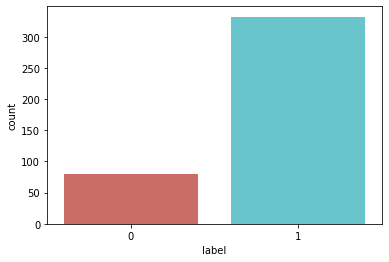

In [15]:
import seaborn as sns

sns.countplot(x='label', data=df, palette='hls')
plt.show()

In [16]:
import pickle

with open('Data/X.pkl', 'wb') as f:
    pickle.dump(X, f)

with open('Data/y.pkl', 'wb') as f:
    pickle.dump(y, f)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(329, 20530)
(83, 20530)
(329,)
(83,)


In [18]:
with open('Data/X_train.pkl', 'wb') as f:
    pickle.dump(X_train, f)

with open('Data/X_test.pkl', 'wb') as f:
    pickle.dump(X_test, f)

with open('Data/y_train.pkl', 'wb') as f:
    pickle.dump(y_train, f)

with open('Data/y_test.pkl', 'wb') as f:
    pickle.dump(y_test, f)

## Create an oversampled dataset using SMOTE

In [2]:
df = pd.read_csv('Data/merged.csv')
df.head()

,Unnamed: 0,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,label
0,TCGA-A8-A06X-01,9.6417,0.5819,0.0000,12.0036,11.2545,10.1480,12.6622,4.2765,1.8007,...,0.5819,3.5764,0.0000,9.3024,11.3338,7.7186,10.6898,7.0992,11.1740,1
1,TCGA-A8-A096-01,9.7665,0.2738,0.8765,11.8118,10.8554,10.4282,12.4810,4.3232,0.0000,...,9.5174,5.3021,0.0000,9.1369,12.7711,8.7307,10.5158,5.9003,9.8729,1
2,TCGA-BH-A0C7-01,10.0931,3.6090,0.0000,11.3820,10.7663,10.3366,12.7240,2.2163,0.3340,...,1.2032,3.8365,0.0000,9.5725,11.8181,7.9077,10.7539,6.5823,9.7063,1
3,TCGA-AR-A0TV-01,9.6694,0.4330,0.0000,11.9378,11.2889,10.6282,11.7596,3.5666,0.0000,...,4.2628,4.6919,2.0530,9.1760,10.3455,8.0183,10.6109,7.2024,10.4880,1
4,TCGA-GM-A3XG-01,10.2287,5.3420,0.0000,11.8971,11.3988,10.3007,12.7280,4.5791,0.0000,...,2.0437,4.1135,0.4297,8.9456,13.6688,6.9724,12.2322,7.7879,10.1317,1


In [3]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

print(X.shape)
print(y.shape)

(412, 20530)
(412,)


In [4]:
print("Percentage of positive samples: ", (y == 1).sum() / y.shape[0])
print("Percentage of negative samples: ", (y == 0).sum() / y.shape[0])

Percentage of positive samples:  0.8058252427184466
Percentage of negative samples:  0.1941747572815534


In [7]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


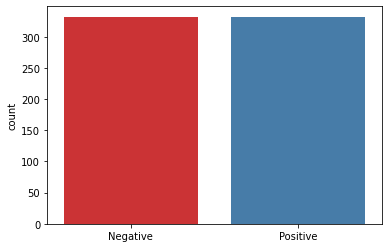

In [8]:
import seaborn as sns
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

oversample = SMOTE(k_neighbors = 10)
syn_X, syn_y = oversample.fit_resample(X, y)

ax = sns.countplot(x = syn_y, palette = 'Set1')
ax.set_xticklabels(['Negative', 'Positive'])
plt.show()

In [9]:
print(syn_X.shape)
print(syn_y.shape)

(664, 20530)
(664,)


In [10]:
print("Percentage of positive samples: ", (syn_y == 1).sum() / syn_y.shape[0])
print("Percentage of negative samples: ", (syn_y == 0).sum() / syn_y.shape[0])

Percentage of positive samples:  0.5
Percentage of negative samples:  0.5


In [11]:
import pickle

pickle.dump(syn_X, open('Data/syn_X.pkl', 'wb'))
pickle.dump(syn_y, open('Data/syn_y.pkl', 'wb'))